<a href="https://colab.research.google.com/github/anaacevedo1980/ProyectoDataScienceI/blob/main/ProyectoDataScieneI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análisis del Servicio de Encomienda

El presente proyecto tiene como objetivo analizar y modelar el comportamiento logístico de un servicio de encomienda a partir de un conjunto de datos que documenta el flujo completo de envíos de extremo a extremo. Este dataset incluye información detallada sobre remitente y destinatario, peso real y volumétrico, modalidad de entrega (Express, Surface, Air Cargo), cargos aplicados (tarifa base, recargos por servicios adicionales, peso facturable) y estado operativo del envío.

A través de técnicas de análisis exploratorio, detección de outliers y visualización multivariada, se busca comprender los patrones que rigen la estructura de costos y el desempeño operativo del sistema. Posteriormente, se implementarán modelos predictivos que permitan estimar el monto total facturado en función de variables logísticas clave, con el fin de optimizar la toma de decisiones en procesos de tarificación, planificación y eficiencia operativa.

Para guiar el análisis, se plantean las siguientes hipótesis:

1) **Influencia del peso facturable**

H₀: El peso facturable (Chargeable Wt) no tiene un efecto significativo sobre el monto total (Total Amount).

H₁: El peso facturable sí tiene un efecto significativo sobre el monto total.


2) **Diferencias por modo de envío**

H₀: El modo de envío (Mode) no influye en el monto total facturado.

H₁: El modo de envío sí influye en el monto total facturado.


3) **Valor agregado y cargos adicionales**

H₀: Los cargos por servicios adicionales (VAS Charges) no afectan significativamente el monto total.

H₁: Los cargos por servicios adicionales sí afectan significativamente el monto total.


4) **Modelo multivariable**

H₀: Ninguna de las variables independientes (peso, piezas, modo, recargos) tiene efecto significativo sobre el monto total.

H₁: Al menos una de las variables independientes tiene efecto significativo sobre el monto total.

Este enfoque permitirá no solo validar estadísticamente el impacto de cada variable, sino también construir modelos robustos de predicción que puedan ser aplicados en entornos reales de logística y distribución.

## Descripción de columnas

   **Origen:** La ciudad desde la que se reservó originalmente o despachó la parcela.

   **Destino:** La ciudad donde se pretende entregar la parcela.

   **Pouch No:** Un identificador interno único (a menudo UUID) utilizado para agrupar envíos en logística.

   **Fecha:** La fecha en que se reservaba el envío, representado en formato número serie de Excel.

   **Nombre del remitente**: Nombre completo de la persona o empresa que envía el paquete.

   **Sender Phone:** Número de contacto móvil o fijo del remitente.

  **Dirección del remitente:** Dirección completa del remitente para la recogida y los registros.

  **Ciudad remitente:** La ciudad del remitente puede duplicar el campo "Origen".

  **Sender State:** El estado indio en el que se encuentra el remitente.

  **Sender Pincode:** El código postal de 6 dígitos (ZIP) de la ubicación del remitente.

  **Sender GSTIN:** GST Número de identificación del remitente (si procede en los envíos comerciales).

  **Piezas totales:** Número de paquetes físicos individuales incluidos en el envío.

  **Wt Actual:** El peso físico real (en kilogramos) de los paquetes.

  **Wt volumétrico:** El peso calculado sobre la base de las dimensiones de volumen, utilizado para los fines de facturación.

  **Efectivo:** El peso utilizado para la facturación -normalmente el mayor de peso real o volumétrico.

  **Papeleo:** Indica si se presentó papeleo junto con el paquete (Sí/No).

  **Firma del remitente:** Denota si el remitente firmó la documentación de despacho (Sí/No).

  **Fecha del remitente:** La fecha en que el remitente completó los documentos de entrega o firmados, en formato serie Excel.

  **Nombre del destinatario:** El nombre completo de la persona u organización pretendía recibir el paquete.

  **Teléfono de Recipiente**: El número de contacto del destinatario previsto.

  **Dirección de destino:** La dirección de entrega completa donde debe enviarse el paquete.

  **Ciudad Destinatario:** La ciudad del destinatario puede duplicar el campo "Destino".

  **Estado receptor:** El estado indio donde reside el receptor.

  **Receptor Pincode:** El código postal o ZIP de 6 dígitos de la dirección de entrega.

  **Descripción:** Una breve descripción textual del contenido del paquete (por ejemplo, documentos, elementos).

  **Servicios Valor Agregado:** Servicios opcionales añadidos al envío, como manipulación frágil, entrega exprés, seguros, etc.

  **Envío No:** El número de seguimiento oficial de DTDC asignado al envío.

  **Fecha de caducidad:** la última fecha válida para la entrega, después de la cual el envío puede expirar o ser devuelto. Almacenado como número de serie de Excel.

  **Código de reserva**: El código único que identifica la sucursal de DTDC o contador de reservas.

  **Interceptor GSTIN:** Número de identificación GST del destinatario (si procede).

  **Nombre del receptor:** Un campo alternativo o duplicado para el nombre del destinatario.

  **Relación:** Describe la relación del receptor con el destinatario original (por ejemplo, uno mismo, Personal, Familia).

  **Estampilla de la empresa:** Indica si se utilizó un sello de la empresa durante el recibo (Sí/No).

  **Firma del receptor:** Indica si el destinatario firmó la confirmación de entrega (Sí/No).

  **Fecha de recepción:** La fecha en que se recibió el paquete, en formato serie de Excel.

  **Tarifa:** La carga de entrega de la base en rupias indias.

  **Cargos por VAS:** Cargos adicionales por cualquier servicio de valor agregado aplicado al envío.

  **Cantidad total:** El importe total facturado para el envío, incluyendo tarifas y complementos.

  **Modo:** El modo de envío elegido . Superficie, aire o Express.

  **Recargo de riesgo:** Denota quién asume la responsabilidad de riesgo - el propietario (enferr) o Carrier (DTDC).

  **Modo de Pago:** El método de pago utilizado en la reserva, como Efectivo, Tarjeta, UPI, Wallet, etc.
    
  **Naturaleza de la administración:** Indica el tipo de paquete de paquetería "Dox" para documentos o "No-Dox" para mercancías/mercancías.


## Carga de datos

In [28]:
# Importar librerías
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Configuraciones opcionales para mejor visualización
sns.set_theme(style="whitegrid") # Establece un tema estético para los gráficos
plt.rcParams['figure.figsize'] = (12, 6) # Establece un tamaño de figura por defecto
warnings.filterwarnings('ignore') # Ignora advertencias, lo cual es util para presentaciones

In [3]:
import requests

url = "https://raw.githubusercontent.com/anaacevedo1980/ProyectoDataScienceI/refs/heads/main/Dataset_Generator_for_DTDC.csv"

response = requests.get(url)  # Hace una solicitud GET para obtener el contenido del archivo
print(response.text[:300])  # Imprime los primeros 300 caracteres del archivo para ver cómo está delimitado

Origin;Destination;Pouch No;Date;Sender's Name;Sender Phone;Sender Address;Sender City;Sender State;Sender Pincode;Sender GSTIN;Total Pieces;Actual Wt;Volumetric Wt;Chargeable Wt;Paperwork;Sender Signature;Sender Date;Recipient Name;Recipient Phone;Recipient Address;Recipient City;Receiver State;Rec


## Análisis exploratorio

In [4]:
df = pd.read_csv(url, sep=';') # lee el archivo,

df.head()# Muestra las primeras 5 filas

,Origin,Destination,Pouch No,Date,Sender's Name,Sender Phone,Sender Address,Sender City,Sender State,Sender Pincode,...,Company Stamp,Receiver Signature,Receive Date,Tariff,VAS Charges,Total Amount,Mode,Risk Surcharge,Mode of Payment,Nature of Consignment
0,Nagpur,Jamshedpur,55e275ad-8da9-49c9-986c-93134fef2c19,25/6/2025,Megha Majumdar,6137840452,"H.No. 425 Varughese Chowk, Above Shop, Nagpur,...",Nagpur,Maharashtra,264582,...,NaN,NaN,30/6/2025,147.22,70.09,217.31,Express,Carrier,Cash,Dox
1,Jaipur,Vizag,7fab4175-11b2-4090-a0ed-4571ccd68878,27/6/2025,Nanda-Saraf,52907142,"48/880, Tripathi, Above Shop, Jaipur, Rajastha...",Jaipur,Rajasthan,200155,...,NaN,NaN,28/6/2025,256.83,82.20,339.03,Surface,Carrier,Card,Dox
2,Lucknow,Bhubaneswar,5231428d-b524-433e-8043-45c7e39a94aa,27/6/2025,Contractor LLC,5081512738,"257, Kulkarni Path, Above Shop, Lucknow, Uttar...",Lucknow,Uttar Pradesh,353311,...,NaN,NaN,28/6/2025,432.45,107.63,540.08,Surface,Carrier,Cash,Non-Dox
3,Coimbatore,Mumbai,2f556b38-298d-4e8c-9310-4e6a3a5fbe61,11/6/2025,Krishna Hans,1518559754,"83/17 Sridhar Zila, Above Shop, Coimbatore, Ta...",Coimbatore,Tamil Nadu,553663,...,NaN,NaN,15/6/2025,1162.00,25.23,1187.23,Express,Carrier,Card,Non-Dox
4,Meerut,Vijayawada,c3154041-34eb-435e-94d8-0900e6a9ed01,1/7/2025,Kuruvilla-Tiwari,1666398391,"16/64 Jayaraman Circle, Above Shop, Meerut, Ut...",Meerut,Uttar Pradesh,273143,...,NaN,NaN,5/7/2025,285.55,67.70,353.25,Surface,Carrier,Cash,Dox


In [5]:
df.describe()  # Estadísticas básicas de columnas numéricas


,Sender Phone,Sender Pincode,Total Pieces,Actual Wt,Volumetric Wt,Chargeable Wt,Recipient Phone,Receiver Pincode,Tariff,VAS Charges,Total Amount
count,4.963900e+04,49639.000000,49639.000000,49639.000000,49639.000000,49639.000000,4.963900e+04,49639.000000,49639.000000,49639.000000,49639.000000
mean,5.010054e+09,499786.484055,2.994480,6.167263,7.716568,7.716568,4.973767e+09,500547.941115,440.854079,67.198937,508.053016
std,2.892645e+09,288607.647965,1.415086,3.375089,3.476748,3.476748,2.883664e+09,287851.384963,243.188225,47.899430,248.097236
min,1.710800e+04,1.000000,1.000000,0.300000,0.440000,0.440000,2.289200e+05,2.000000,19.900000,0.000000,22.630000
25%,2.479984e+09,248197.500000,2.000000,3.260000,4.800000,4.800000,2.473943e+09,252065.000000,255.040000,27.305000,320.395000
50%,5.018929e+09,499479.000000,3.000000,6.190000,7.740000,7.740000,4.960678e+09,502320.000000,409.980000,67.450000,477.640000
75%,7.533459e+09,748322.000000,4.000000,9.080000,10.640000,10.640000,7.459426e+09,749229.500000,571.570000,108.860000,644.805000
max,9.999872e+09,999981.000000,5.000000,12.000000,14.970000,14.970000,9.999958e+09,999973.000000,1372.900000,150.000000,1481.160000


In [6]:
df.shape # describe la cantidad de filas y columnas que tiene el dataset

(49639, 42)

In [7]:
df.info()      # muestra tipos de datos y valores no nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Origin                 49639 non-null  object 
 1   Destination            49639 non-null  object 
 2   Pouch No               49639 non-null  object 
 3   Date                   49639 non-null  object 
 4   Sender's Name          49639 non-null  object 
 5   Sender Phone           49639 non-null  int64  
 6   Sender Address         49639 non-null  object 
 7   Sender City            49639 non-null  object 
 8   Sender State           49639 non-null  object 
 9   Sender Pincode         49639 non-null  int64  
 10  Sender GSTIN           26778 non-null  object 
 11  Total Pieces           49639 non-null  int64  
 12  Actual Wt              49639 non-null  float64
 13  Volumetric Wt          49639 non-null  float64
 14  Chargeable Wt          49639 non-null  float64
 15  Pa

In [8]:
df.isnull().sum()  # Cuenta valores faltantes por columna

,0
Origin,0
Destination,0
Pouch No,0
Date,0
Sender's Name,0
Sender Phone,0
Sender Address,0
Sender City,0
Sender State,0
Sender Pincode,0


In [9]:
print( (df.isnull().sum() /len(df))*100) # nos muestra el % de datos nulos en los campos que tienen nulos

Origin                    0.000000
Destination               0.000000
Pouch No                  0.000000
Date                      0.000000
Sender's Name             0.000000
Sender Phone              0.000000
Sender Address            0.000000
Sender City               0.000000
Sender State              0.000000
Sender Pincode            0.000000
Sender GSTIN             46.054514
Total Pieces              0.000000
Actual Wt                 0.000000
Volumetric Wt             0.000000
Chargeable Wt             0.000000
Paperwork                 0.000000
Sender Signature         39.944399
Sender Date               0.000000
Recipient Name            0.000000
Recipient Phone           0.000000
Recipient Address         0.000000
Recipient City            0.000000
Receiver State            0.000000
Receiver Pincode          0.000000
Description               0.000000
Value Added Services     20.628941
Consignment No            0.000000
Expiry Date               0.000000
Booking Code        

### Visualizaciones

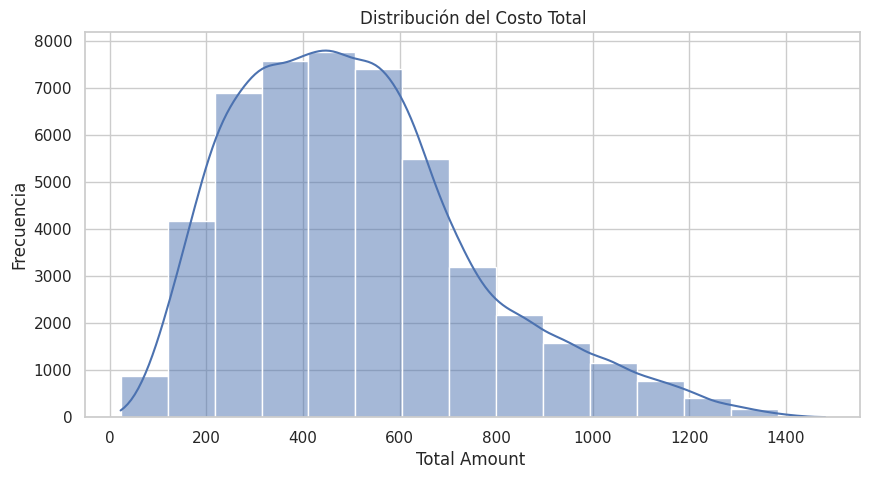

In [10]:
# Histograma de Costo Total de los envios
plt.figure(figsize=(10, 5)) # Ajustar tamaño para este gráfico específico
sns.histplot(data=df, x='Total Amount', bins=15, kde=True)
plt.title('Distribución del Costo Total')
plt.xlabel('Total Amount ')
plt.ylabel('Frecuencia')
plt.show()

El objetivo de esta visualizacion es ver cómo se distribuyen los costos totales (Total Amount) en función de su frecuencia (Count).

**Patrones observables:**

La mayoría de los puntos están concentrados en la parte inferior izquierda (valores bajos de Total Amount y Count), lo que sugiere que:

Hay muchos casos con montos totales pequeños y baja frecuencia.

Algunos puntos aislados hacia la derecha o arriba indican valores atípicos (outliers):

Pocos casos con montos totales altos (ej. cerca de 1400) o frecuencias elevadas.

Como conclusion podemos decir que la distribución es asimétrica (sesgada hacia la izquierda), común en datos financieros donde la mayoría de los costos son bajos, pero unos pocos son significativamente altos.


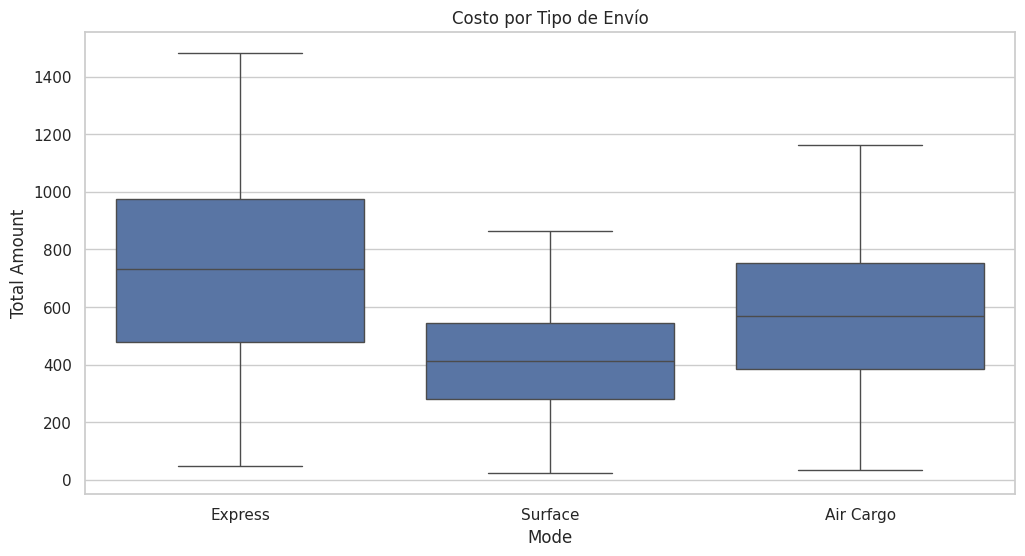

In [11]:
# Boxplot de "Total Amount" por "Mode"
sns.boxplot(x="Mode", y="Total Amount", data=df)
plt.title("Costo por Tipo de Envío")
plt.show()



El gráfico de caja (boxplot) muestra la distribución de los costos totales por modo de envío.
 Los tres modos son: Express, Surface y Air Cargo.

**Express**  Es el modo con el rango de costos más amplio, llegando hasta aproximadamente 1400 unidades monetarias. La mediana (línea en medio de la caja) está alrededor de 700-800, lo que indica que la mitad de los costos están por debajo y por encima de ese valor. La caja (intercuartílico) indica que el 50% de los costos oscilan entre aproximadamente 500 y 1000. Los bigotes muestran que hay costos extremos, con algunos valores cercanos a 0 y otros hasta aproximadamente 1400.

**Surface** Es el modo con los costos más bajos en promedio. La mediana está alrededor de 400-500, por lo que la mayoría de los costos son menores comparados con los otros modos. La dispersión (tamaño de la caja) es menor, indicando que los costos están más concentrados en torno a esa media. Los costos extremos varían desde cerca de 0 hasta aproximadamente 800-900.

**Air Cargo** Tiene una dispersión intermedia, con una mediana alrededor de 700. Los costos pueden variar desde aproximadamente 200 hasta 1200. La distribución muestra que, en general, el costo del envío por aire es más alto que el de surface, pero menos que el express en algunos casos.


Express es el modo más costoso y también tiene una mayor variabilidad en los costos. Surface es más económico y más consistente en los costos. Air Cargo tiene costos intermedios y una dispersión considerable.


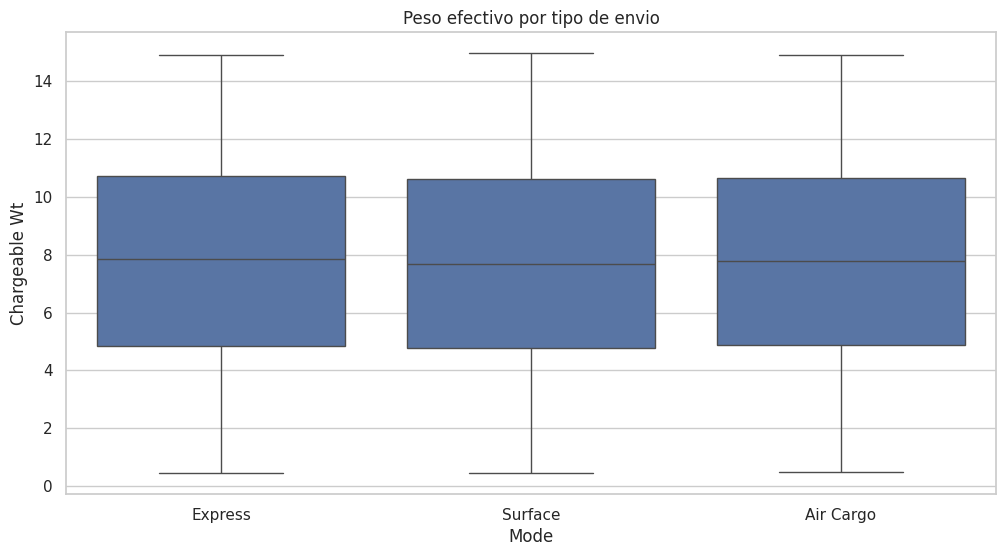

In [12]:
# Boxplot de "Chargeable Wt" por "Mode"
sns.boxplot(x="Mode", y="Chargeable Wt", data=df)
plt.title("Peso efectivo por tipo de envio")
plt.show()

Cada caja representa la distribución del peso facturable para ese tipo de envío:

Mediana (línea dentro de la caja): Está cerca de 8 para todos los tipos.

Rango intercuartílico (IQR): Va aproximadamente de 6 a 10, lo que indica que la mayoría de los envíos tienen un peso facturable dentro de ese rango.

Bigotes (whiskers): Se extienden desde cerca de 0 hasta 14, mostrando el rango total sin considerar outliers extremos.

**Outliers:** No se ven puntos fuera de los bigotes, lo que sugiere que no hay valores extremadamente atípicos en esta muestra.

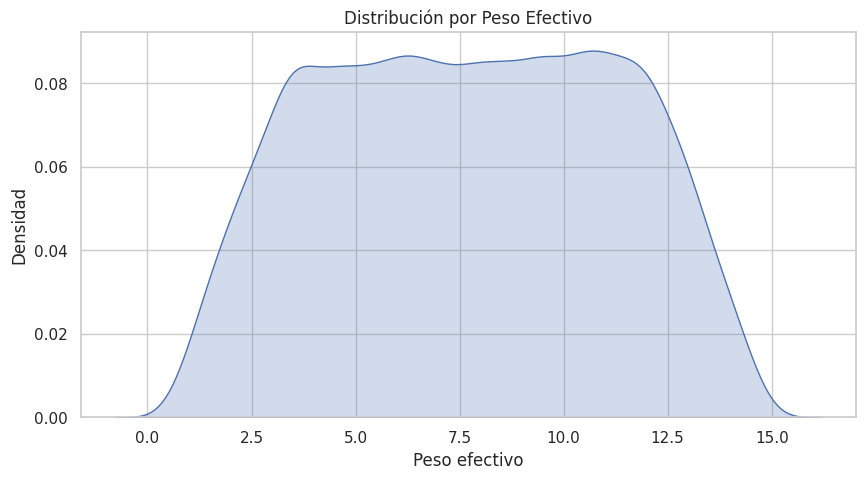

In [13]:
# KDE plot de Distribución peso efectivo (el mayor entre peso actual y volumetrico, es el que se usa para facturar)
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Chargeable Wt', fill=True)
plt.title('Distribución por Peso Efectivo')
plt.xlabel('Peso efectivo')
plt.ylabel('Densidad')
plt.show()

Pico principal: Hay una concentración de envíos con peso efectivo entre 6 y 10 kg, donde la densidad es más alta.

Distribución unimodal: La curva tiene un solo pico, lo que indica que la mayoría de los envíos tienen pesos similares.

Cola hacia la derecha: Hay algunos envíos con pesos más altos (hasta 15 kg), pero son menos frecuentes.

In [ ]:
total_envios = len(df) #calculamos el total de envios
print(f"Total de envíos: {total_envios}")

envios_pesados = df[df['Chargeable Wt'] > 7.5] #calculamos la cantidad de envios mas pesados
print(f"Envíos pesados (>7.5 kg): {len(envios_pesados)}")

envios_livianos = df[df['Chargeable Wt'] < 7.5] #calculamos la cantidad de envios mas livianos
print(f"Envíos livianos (<=7.5 kg): {len(envios_livianos)}")

Total de envíos: 49639
Envíos pesados (>7.5 kg): 25806
Envíos livianos (<=7.5 kg): 23799


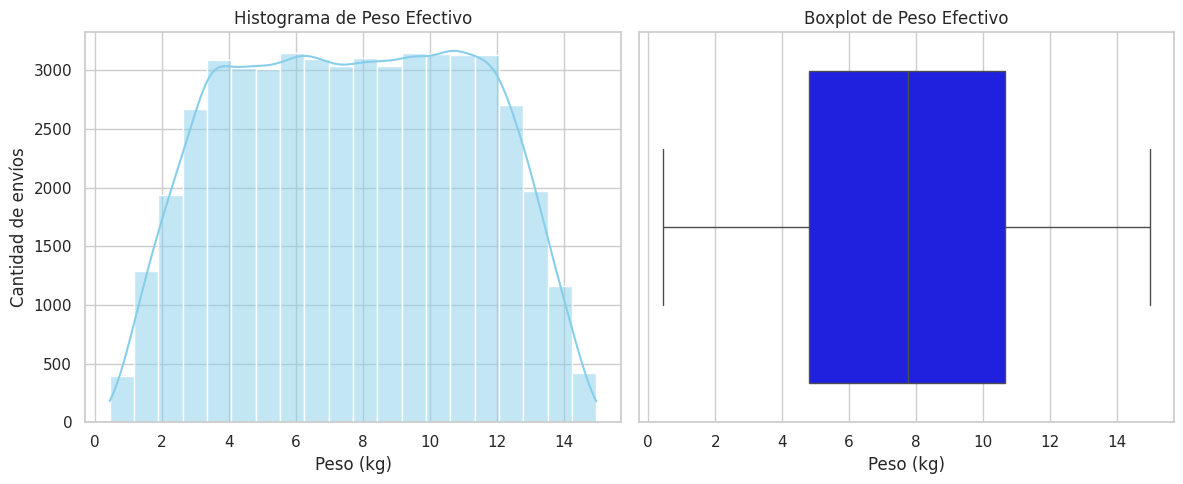

In [14]:

##Distribución peso efectivo (el mayor entre peso actual y volumetrico, es el que se usa para facturar)

plt.figure(figsize=(12, 5))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Chargeable Wt', bins=20, kde=True, color='skyblue')
plt.title('Histograma de Peso Efectivo')
plt.xlabel('Peso (kg)')
plt.ylabel('Cantidad de envíos')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Chargeable Wt', color='blue')
plt.title('Boxplot de Peso Efectivo')
plt.xlabel('Peso (kg)')

plt.tight_layout()
plt.show()

El peso efectivo representa el mayor valor entre el peso real y el peso volumétrico, y es el que se usa para facturación, por eso es tan importante.

La mayoría de los paquetes facturados están en un rango medio (entre 3 y 12 kg), lo cual puede ser una señal de:

- Un patrón de clientes que envían paquetes medianos.

- Reglas de empaque o restricciones de envío que inducen a ese rango.

- Una posible política comercial que desalienta paquetes muy ligeros o muy pesados.

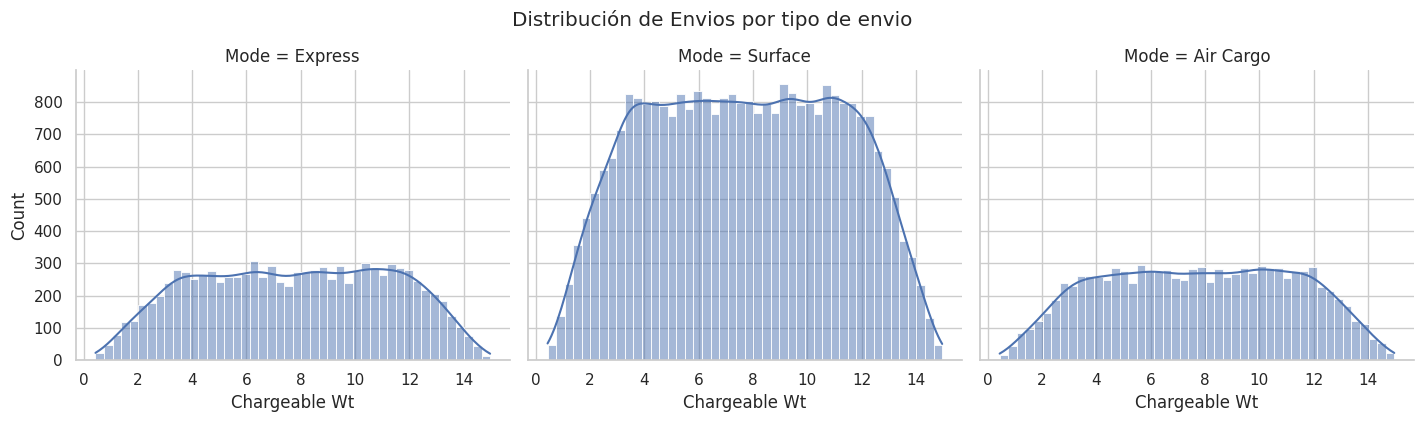

In [15]:
# Displot: Distribución de Envios por tipo de envio
sns.displot(data=df, x='Chargeable Wt', col='Mode', kde=True, height=4, aspect=1.2)
plt.suptitle('Distribución de Envios por tipo de envio', y=1.05) # Título general ajustado
plt.show()

El medio de envio mas utilizado es Surface, muy pocos envios de menos de 2kg en las tres modalidades, el rango principal en las tres es de 3kg a 12kg.

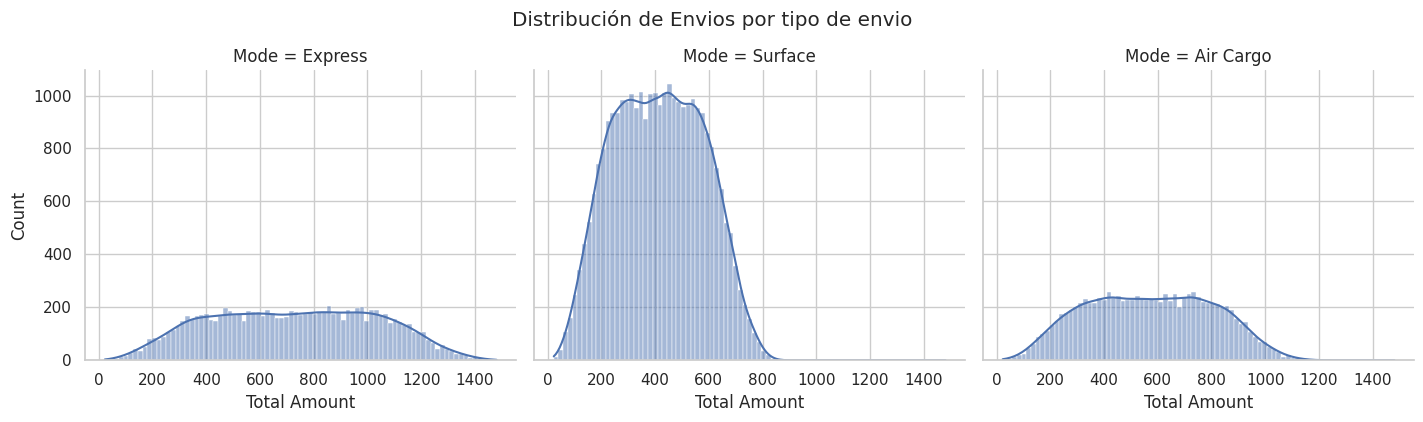

In [16]:
# Displot: Distribución de Envios por tipo de envio
sns.displot(data=df, x='Total Amount', col='Mode', kde=True, height=4, aspect=1.2)
plt.suptitle('Distribución de Envios por tipo de envio', y=1.05) # Título general ajustado
plt.show()

 **Express**

Rango amplio de montos: desde 100  hasta mas de 400.

Distribución relativamente plana entre 300 y 400

Algunos valores más altos (outliers), pero no dominan.

Express parece tener una amplia gama de tarifas, lo cual puede deberse a:

Variación en distancias, tamaños/volúmenes diversos, servicios premium u opcionales.


**Surface**

Pico claro entre 300 y 500, caída brusca a partir de los 600.

Distribución más concentrada que las otras dos modalidades.

Muy pocos envíos con montos > 700.

Surface tiene una estructura de tarifas más estándar y predecible.
Parece ser el método más económico y masivo, posiblemente con rutas y reglas bien definidas.

**Air Cargo**

Rango entre 200 y 1200, con muchos valores entre 400 y 800.

Distribución levemente sesgada a la derecha.

Aunque tiene pocos envíos, sus montos son más elevados en general.

Air Cargo es claramente más caro por envío individual, lo cual es lógico dado  el tipo de servicio. Ideal para envíos urgentes, delicados o internacionales.




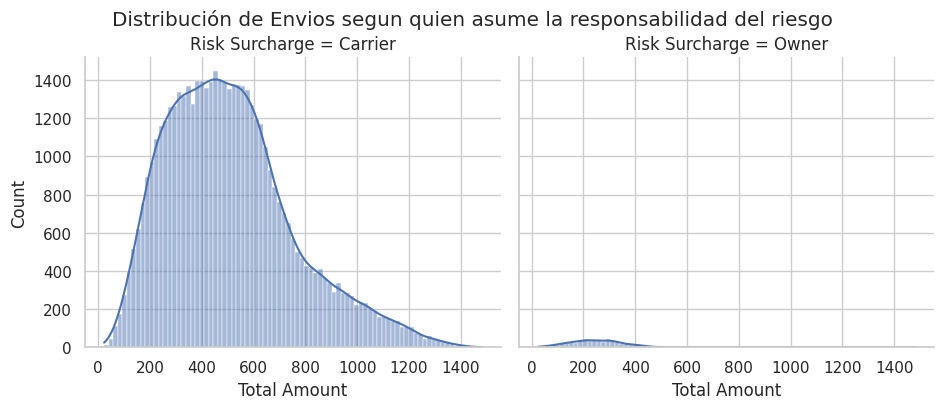

In [17]:
# Displot: Distribución de Envios con cargo adicional
sns.displot(data=df, x='Total Amount', col='Risk Surcharge', kde=True, height=4, aspect=1.2)
plt.suptitle('Distribución de Envios segun quien asume la responsabilidad del riesgo', y=1.02) # Título general ajustado
plt.show()

**Carrier**  (Transportista)

Alta concentración de envíos en torno a los 400 pesos

La cantidad máxima supera los 1400 envíos en ese rango.

La distribución tiene una cola larga hacia la derecha, lo que indica que hay algunos envíos con montos mucho más altos, aunque menos frecuentes.

**Owner** (Propietario)

Mucho menor volumen de envíos con riesgos a cargo del propietario.

La cantidad máxima es significativamente más bajo que en el caso del transportista.

Aunque el rango de montos es similar (hasta 1400), la frecuencia es mucho menor.

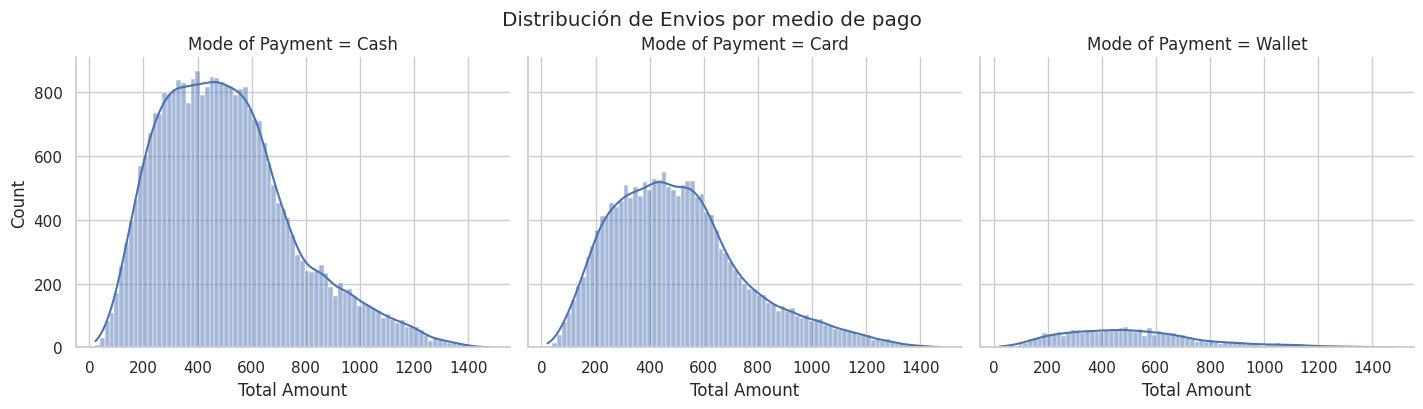

In [ ]:
# Displot: Distribución de Envios por medio de pago
sns.displot(data=df, x='Total Amount', col='Mode of Payment', kde=True, height=4, aspect=1.2)
plt.suptitle('Distribución de Envios por medio de pago', y=1.02) # Título general ajustado
plt.show()

Análisis por medio de pago

**Cash**

Pico de envíos entre 300 y 500.

Distribución sesgada hacia la derecha: hay muchos envíos con valores bajos y pocos con valores altos (> 800).

Es claramente el medio de pago más utilizado, con más de 800 envíos por rango.

El Efectivo domina las operaciones, especialmente en envíos de bajo a mediano valor.

Probablemente se trata de clientes ocasionales, sin integración digital.


**Card**

Distribución parecida a la de efectivo, pero con menor volumen.

Rango más concentrado entre 300 y 600, también con sesgada a a derecha

Es el segundo medio de pago más común.

La tarjeta se utiliza para montos similares al efectivo, pero quizá por un perfil de cliente más digital o para pagos sin manejo de efectivo.


**Wallet**

Mucho menor volumen.

Distribución en un rango similar (300 -600), con muy pocos valores extremos.

La billetera digital todavía tiene poca adopción, aunque su comportamiento es similar a los otros medios.


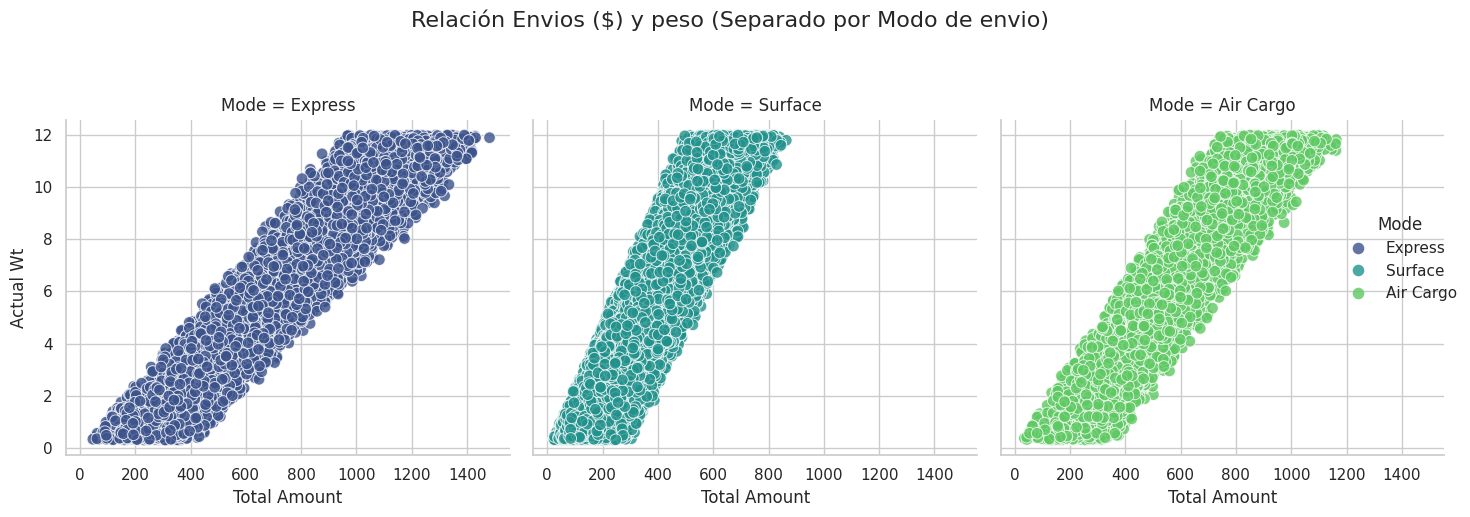

In [ ]:
# 2.2: Relplot para separar la relación por Modo de envio
sns.relplot(data=df, x='Total Amount', y='Actual Wt', hue='Mode', col='Mode', kind='scatter',
            height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')
plt.suptitle('Relación Envios ($) y peso (Separado por Modo de envio)', y=1.03, fontsize=16)
# Ajustar etiquetas individualmente si es necesario (ejemplo para el primer subplot)
plt.gcf().axes[0].set_xlabel("Total Amount")
plt.gcf().axes[0].set_ylabel("Actual Wt")
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para que el suptitle  no se solape
plt.show()

Express: Parece tener una relación más dispersa, con montos altos incluso para pesos bajos. Esto podría indicar tarifas más elevadas o cargos fijos.

Surface: Muestra una relación más lineal: a mayor peso, mayor monto. Esto sugiere que el costo está más directamente vinculado al peso.

Air Cargo: También tiene cierta dispersión, pero con una tendencia a montos más altos en pesos intermedios. Podría reflejar tarifas más complejas o cargos adicionales.

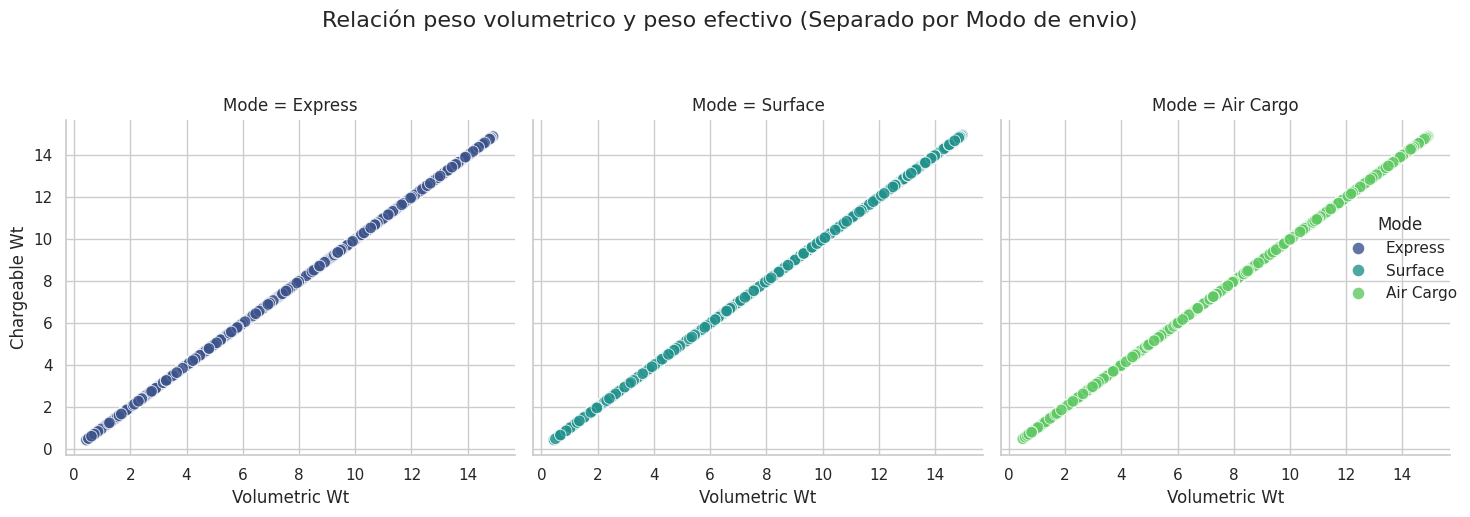

In [ ]:
# 2.2: Relplot para separar la relación por Modo de envio
sns.relplot(data=df, x='Volumetric Wt', y='Chargeable Wt', hue='Mode', col='Mode', kind='scatter',
            height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')
plt.suptitle('Relación peso volumetrico y peso efectivo (Separado por Modo de envio)', y=1.03, fontsize=16)
# Ajustar etiquetas individualmente si es necesario (ejemplo para el primer subplot)
plt.gcf().axes[0].set_xlabel("Volumetric Wt")
plt.gcf().axes[0].set_ylabel("Chargeable Wt")
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para que el suptitle no se solape
plt.show()

En los tres modos, se observa una relación lineal clara: a mayor peso volumétrico, mayor peso efectivo (facturable).

Esto sugiere que el peso facturable se calcula directamente a partir del peso volumétrico, lo cual es común en logística cuando se considera el espacio ocupado más que el peso real.

La dispersión es baja, lo que indica que hay consistencia en la fórmula de cálculo entre los envíos.

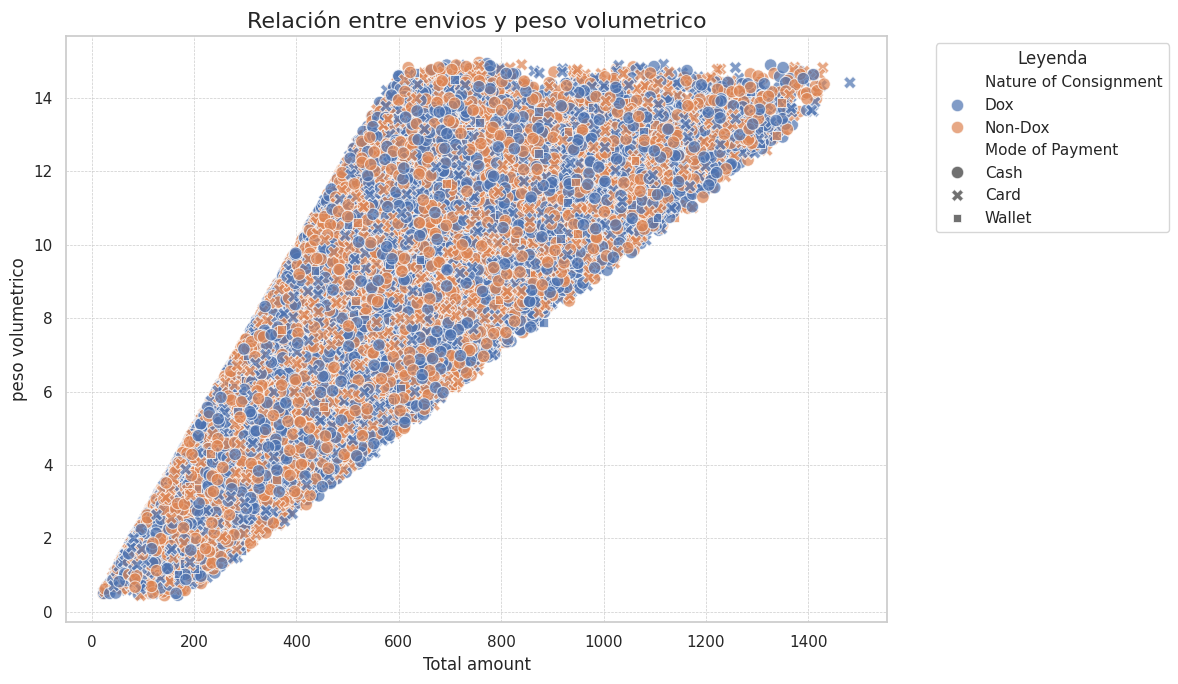

In [ ]:
# 2.1: Scatterplot de envios ($) y peso volumetrico coloreado por Región
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Total Amount', y='Volumetric Wt', hue='Nature of Consignment', style='Mode of Payment', s=80, alpha=0.7)
plt.title('Relación entre envios y peso volumetrico', fontsize=16)
plt.xlabel('Total amount', fontsize=12)
plt.ylabel('peso volumetrico', fontsize=12)
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Hay una tendencia positiva: a mayor peso volumétrico, mayor monto facturado.

Los envíos Non-Dox parecen estar más concentrados en rangos altos de peso y ventas, lo que tiene sentido si se trata de mercancías más voluminosas.

Los envíos Dox se agrupan en pesos bajos y montos menores, como es típico en documentos.

El modo de pago no parece alterar la distribución de manera significativa

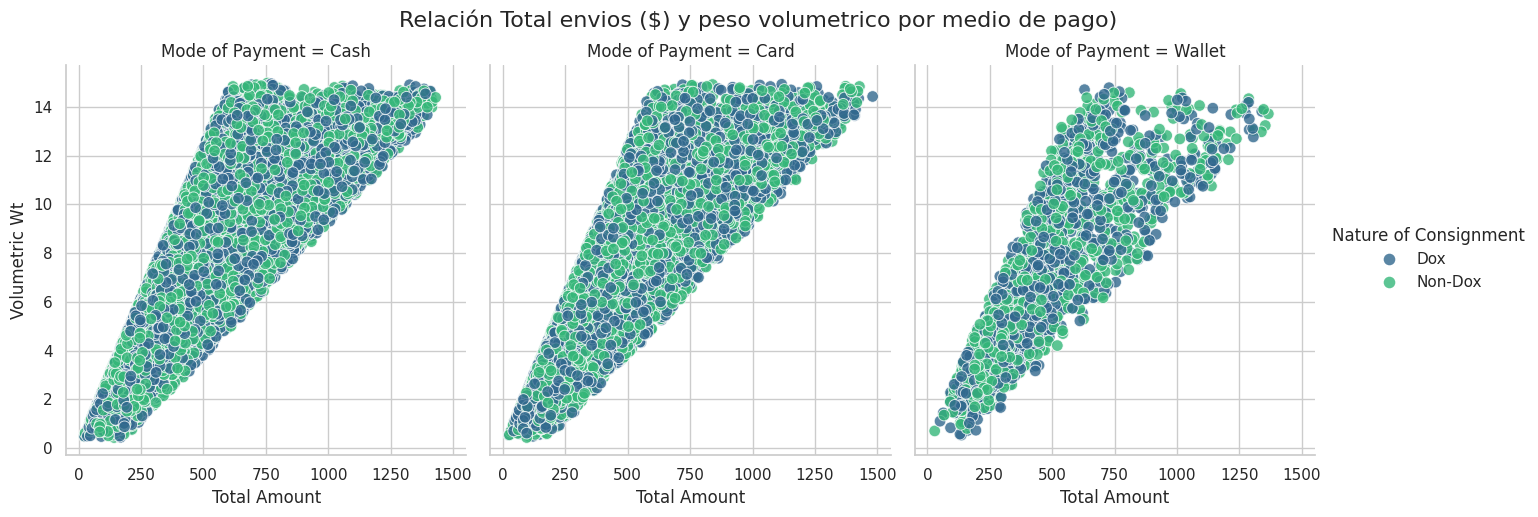

In [ ]:
# 2.2: Relplot para separar la relación Total envios ($), peso volumetrico por medio de pago
sns.relplot(data=df, x='Total Amount', y='Volumetric Wt', hue='Nature of Consignment', col='Mode of Payment', kind='scatter',
            height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')
plt.suptitle('Relación Total envios ($) y peso volumetrico por medio de pago)', y=1.03, fontsize=16)
# Ajustar etiquetas individualmente si es necesario (ejemplo para el primer subplot)
plt.gcf().axes[0].set_xlabel("Total Amount")
plt.gcf().axes[0].set_ylabel("Volumetric Wt")
plt.tight_layout(rect=[0, 1, 1, 0.97]) # Ajustar para que el suptitle no se solape
plt.show()

En todos los modos de pago, hay más envíos con bajo peso y bajo monto.

A medida que el monto aumenta, los puntos se dispersan y se vuelven menos frecuentes.


No hay diferencias drásticas entre los tres métodos de pago en cuanto a la forma de la distribución.


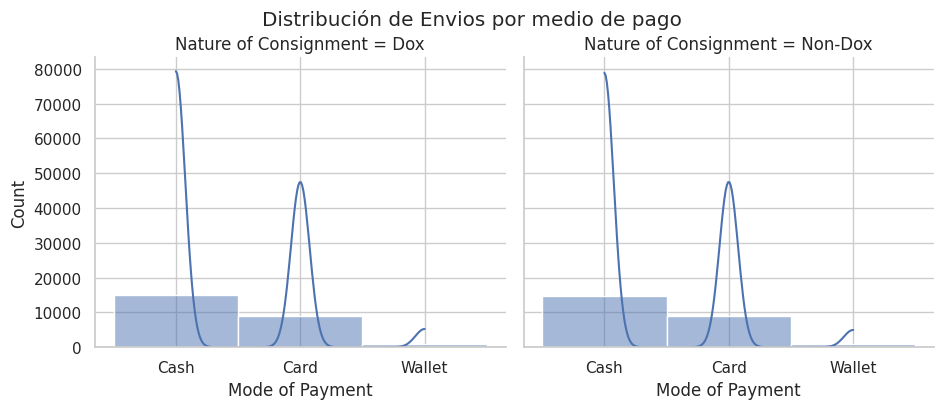

In [ ]:
# Displot: Distribución de Envios por medio de pago
sns.displot(data=df, x='Mode of Payment', col='Nature of Consignment', kde=True, height=4, aspect=1.2)
plt.suptitle('Distribución de Envios por medio de pago', y=1.02) # Título general ajustado
plt.show()

La forma de las curvas sugiere que la distribución es bastante sesgada hacia el uso de efectivo.

No hay diferencias drásticas entre Dox y Non-Dox en cuanto al patrón de pago.

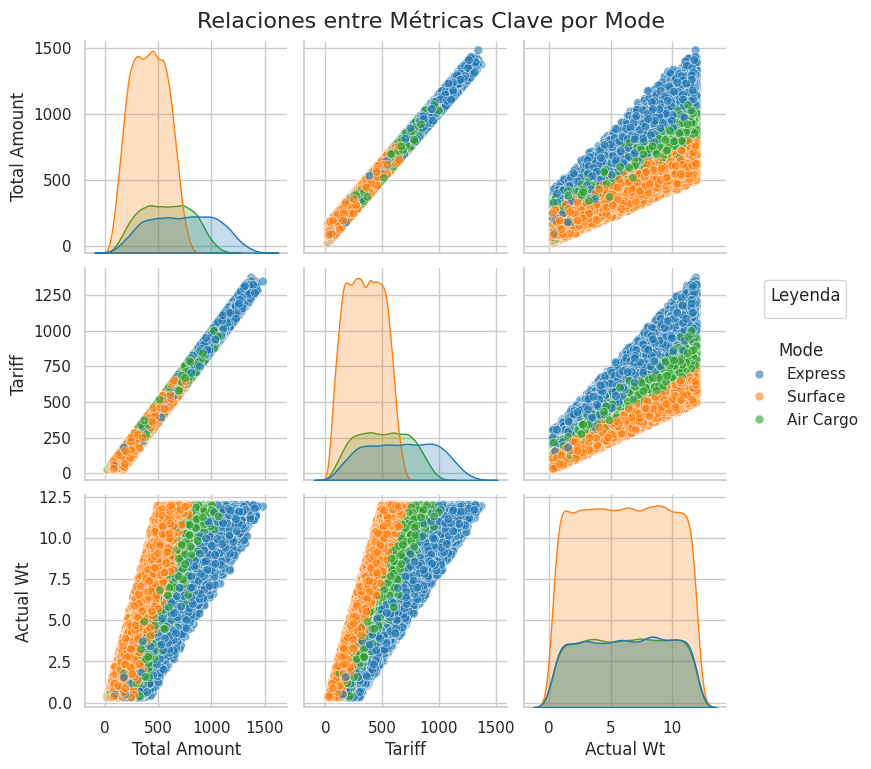

In [ ]:
# Pairplot para visión general
columnas_pairplot = ['Total Amount', 'Tariff', 'Actual Wt','Mode',]
sns.pairplot(df[columnas_pairplot], hue='Mode', palette='tab10', plot_kws={'alpha':0.6, 's':40}, diag_kind='kde')
plt.legend(title='Leyenda', bbox_to_anchor=(1.15, 2.05), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.suptitle('Relaciones entre Métricas Clave por Mode', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 1, 1, 1])
plt.show()

**Air Cargo** parece tener tarifas más altas para pesos similares, lo que podría reflejar costos operativos.

**Surface** muestra una mayor dispersión en peso, lo que sugiere que transporta cargas más variadas.

**Express** tiene valores más concentrados, posiblemente por tratarse de envíos más estandarizados.

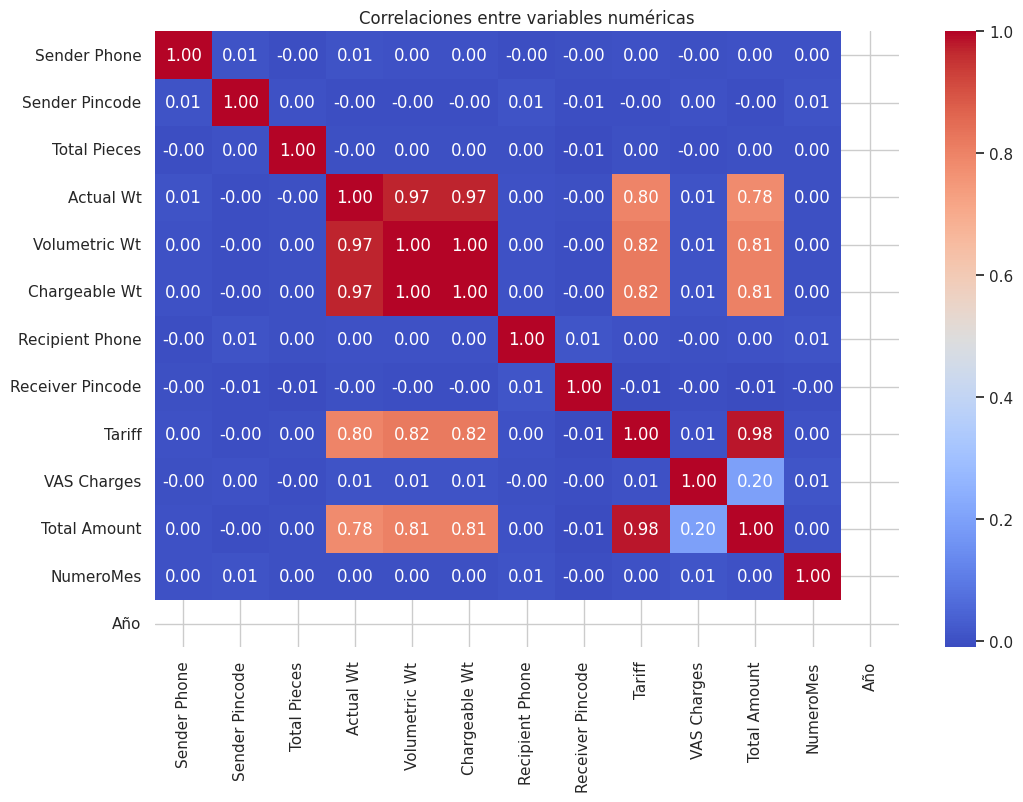

In [ ]:
# Mapa de calor de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()

**Alta correlación entre pesos:**

Actual Wt, Volumetric Wt y Chargeable Wt están fuertemente correlacionados entre sí (casi 1.00).

Chargeable Wt y Total Amount también tienen una correlación alta, lo que sugiere que el peso facturable influye fuertemente en el costo final.

Tariff y VAS Charges también están correlacionados con Total Amount

Datos de contacto (teléfonos y códigos postales) tienen correlaciones muy bajas con las demás variables, lo que indica que no influyen directamente en el peso ni en el costo.

## Preprocesamiento de Datos

In [ ]:
# Eliminar columnas irrelevantes (ej: "Pouch No", "Consignment No")
df = df.drop(columns=["Pouch No", "Consignment No"])

In [ ]:
# Limpieza de datos (tratamiento de nulos)

df["Sender GSTIN"].fillna("No GSTIN", inplace=True)# rellena los gstin (número de identificación del impuesto al valor agregado) nulos con ceros
df["Recipient GSTIN"].fillna("No GSTIN", inplace=True)# rellena los gstin (número de identificación del impuesto al valor agregado) nulos con ceros
df["Actual Wt"].fillna(df["Actual Wt"].mean(), inplace=True)#  rellena los pesos actuales nulos con la media
df["Sender Signature"].fillna("No", inplace=True) ##rellena los vacios con "No"
df["Receiver Signature"].fillna("No", inplace=True)##rellena los vacios con "No"
df["Company Stamp"].fillna("No", inplace=True)##rellena los vacios con "No"
df["Value Added Services"].fillna("No", inplace=True)##rellena los vacios con "No"

In [ ]:
# transformar una columna de tipo object (o string) a datetime y darle formato: día/mes/año
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Sender Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Receive Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
# Extraer el mes y el año (puede ser útil para agrupaciones)
df['NumeroMes'] = df['Date'].dt.month
df['Año'] = df['Date'].dt.year

# Verificar el cambio en el tipo de dato y las nuevas columnas
print("Información del DataFrame después de convertir 'Mes':")
df.info()

Información del DataFrame después de convertir 'Mes':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Origin                 49639 non-null  object        
 1   Destination            49639 non-null  object        
 2   Date                   49639 non-null  datetime64[ns]
 3   Sender's Name          49639 non-null  object        
 4   Sender Phone           49639 non-null  int64         
 5   Sender Address         49639 non-null  object        
 6   Sender City            49639 non-null  object        
 7   Sender State           49639 non-null  object        
 8   Sender Pincode         49639 non-null  int64         
 9   Sender GSTIN           49639 non-null  object        
 10  Total Pieces           49639 non-null  int64         
 11  Actual Wt              49639 non-null  float64       
 12  Volume

 ## **2da entrega**

In [19]:
pd.get_dummies(df['Mode'], drop_first=True) ##convertimos la variable categorica a numerica (Este código transforma la columna 'Mode' en varias columnas numéricas donde cada columna representa una categoría diferente de 'Modo' y los valores son 0 o 1)

,Express,Surface
0,True,False
1,False,True
2,False,True
3,True,False
4,False,True
...,...,...
49634,False,True
49635,False,True
49636,False,True
49637,False,False


In [22]:
dummies = pd.get_dummies(df['Mode'], drop_first=True) ##convertimos la variable categorica a numerica (Este código transforma la columna 'Mode' en varias columnas numéricas donde cada columna representa una categoría diferente de 'Modo' y los valores son 0 o 1)
##La categoría 'Aéreo' estaría implícita cuando 'Express' y 'Surface' son 0 Esto se hace para evitar problemas en el modelo
dummies.index = df.index ## nos aseguramos que las columnas  del 'dummies' tengan el mismo índice que tu DataFrame

In [24]:
df = pd.concat([df, dummies], axis=1)## para añadir las nuevas columnas al DataFrame manteniendo las originales

In [26]:
df.drop('Mode', axis=1, inplace=True) ## luego eliminamos la columna original de 'Mode'

In [27]:
# Verificar el cambio en el tipo de dato y las nuevas columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Origin                 49639 non-null  object 
 1   Destination            49639 non-null  object 
 2   Pouch No               49639 non-null  object 
 3   Date                   49639 non-null  object 
 4   Sender's Name          49639 non-null  object 
 5   Sender Phone           49639 non-null  int64  
 6   Sender Address         49639 non-null  object 
 7   Sender City            49639 non-null  object 
 8   Sender State           49639 non-null  object 
 9   Sender Pincode         49639 non-null  int64  
 10  Sender GSTIN           26778 non-null  object 
 11  Total Pieces           49639 non-null  int64  
 12  Actual Wt              49639 non-null  float64
 13  Volumetric Wt          49639 non-null  float64
 14  Chargeable Wt          49639 non-null  float64
 15  Pa

## Especificación de variables dependientes e independientes

In [31]:
X = df[['Express', 'Surface', 'Chargeable Wt', 'Tariff'] ] ## variables independientes

In [32]:
y = df[['Total Amount']] ## variable dependiente

## Algoritmo de regresión lineal


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instanciar y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


Coeficientes: [[ 0.44618908  1.24931605 -0.00390979  1.00220864]]
Intercepto: [65.35746119]
R² score: 0.9630422900439978
RMSE: 2283.7290197266266



## **Conclusiones**

 El **R2 score** de 0.963 indica que el modelo explica aproximadamente el 96.3% de la variación en la variable dependiente.

 El **RMSE** de 2283.73 es el error promedio de las predicciones.

 El **intercepto** de 165.36$ es el valor de la variable dependiente cuando todas las variables independientes son cero.

 Los **coeficientes individuales** de cada variable independiente muestran cómo afectan a la variable dependiente es decir:

- un aumento en Express aumenta el resultado en 0.461898
- un aumento en Surface aumenta el resultado en 1.24931605
- un aumento en Chargeable Wt aumenta el resultado en -0.00390979
- un aumento en Tariff aumenta el resultado en 1.00220864
